In [27]:
import pandas as pd

In [28]:
#carregando dataset
df = pd.read_csv("C:/Users/carlo/OneDrive/Documentos/DATA CASES/Analise-Prod-Agricola-India/crop_production.csv")

#exibindo as primeiras linhas do dataset
print(df.head())

                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  


In [29]:
#colunas e tipos de dados
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB
None


In [30]:
#exibe estatísticas descritivas
print(df.describe())

           Crop_Year          Area    Production
count  246091.000000  2.460910e+05  2.423610e+05
mean     2005.643018  1.200282e+04  5.825034e+05
std         4.952164  5.052340e+04  1.706581e+07
min      1997.000000  4.000000e-02  0.000000e+00
25%      2002.000000  8.000000e+01  8.800000e+01
50%      2006.000000  5.820000e+02  7.290000e+02
75%      2010.000000  4.392000e+03  7.023000e+03
max      2015.000000  8.580100e+06  1.250800e+09


In [31]:
#limpeza de dados
#verificar se há valores nulos
print(df.isnull().sum())

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64


In [32]:
#removendo os valores nulos
df.dropna()


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

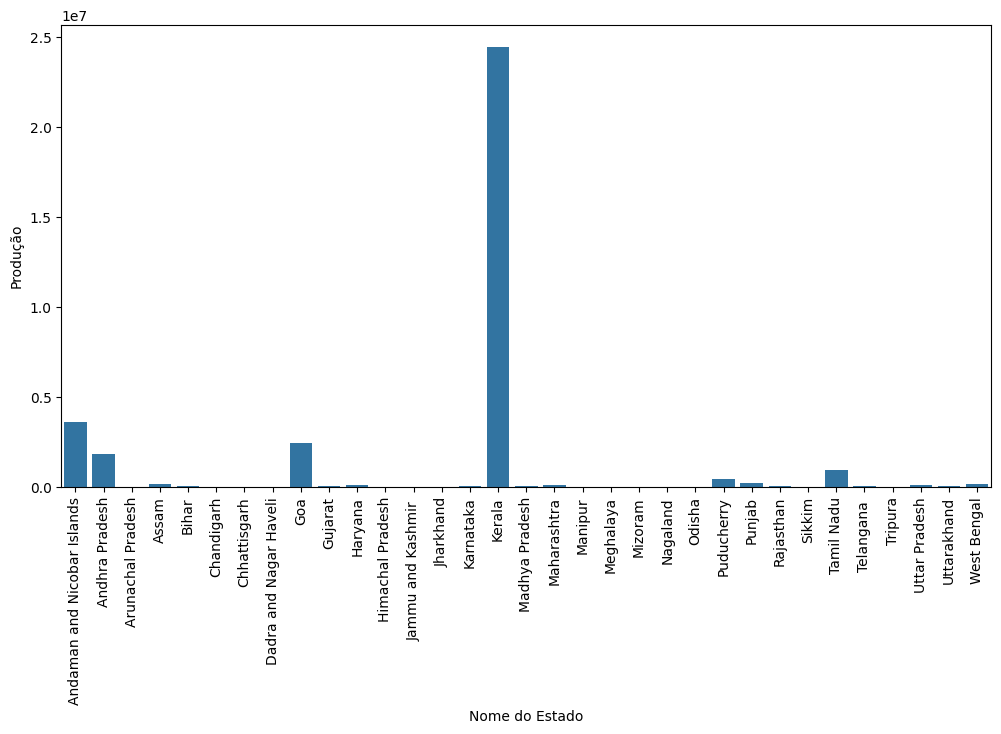

In [34]:
#plotando produção por estado
plt.figure(figsize=(12,6))
sns.barplot(x='State_Name', y='Production', data=df, errorbar=None)
plt.xticks(rotation=90)
plt.xlabel('Nome do Estado')
plt.ylabel('Produção')
plt.show()

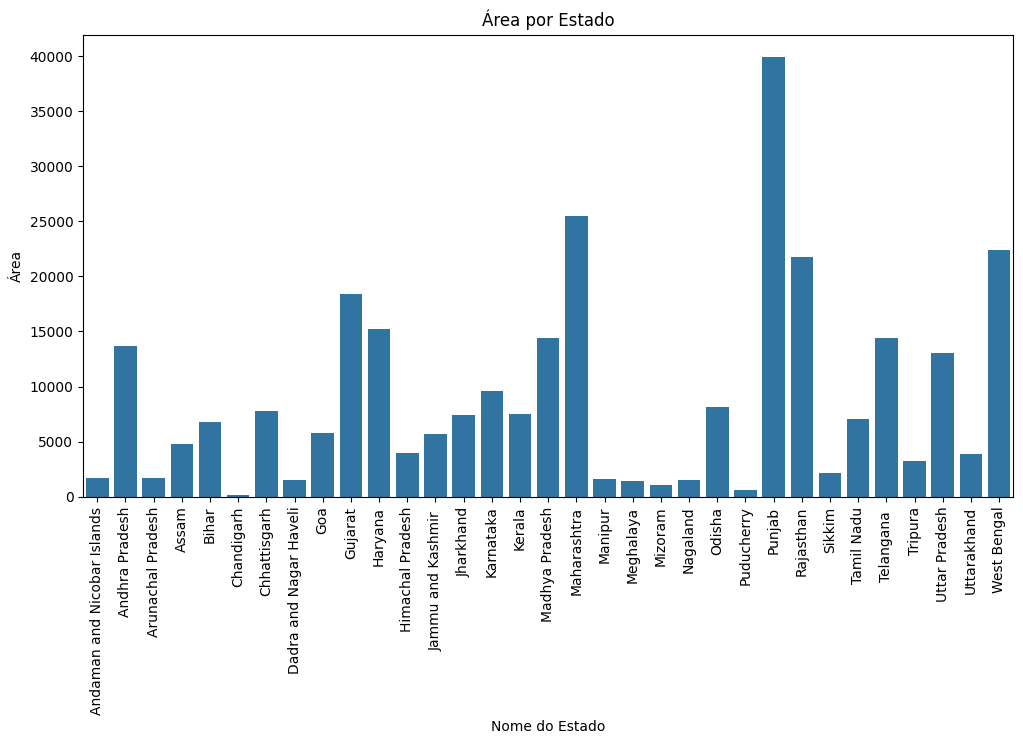

In [35]:
#Área por estado
plt.figure(figsize=(12,6))
sns.barplot(x='State_Name', y='Area', data=df, errorbar=None)
plt.xticks(rotation=90)
plt.title('Área por Estado')
plt.xlabel('Nome do Estado')
plt.ylabel('Área')
plt.show()          

In [36]:
#correlação de variáveis
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

            Crop_Year      Area  Production
Crop_Year    1.000000 -0.026022    0.006989
Area        -0.026022  1.000000    0.040587
Production   0.006989  0.040587    1.000000


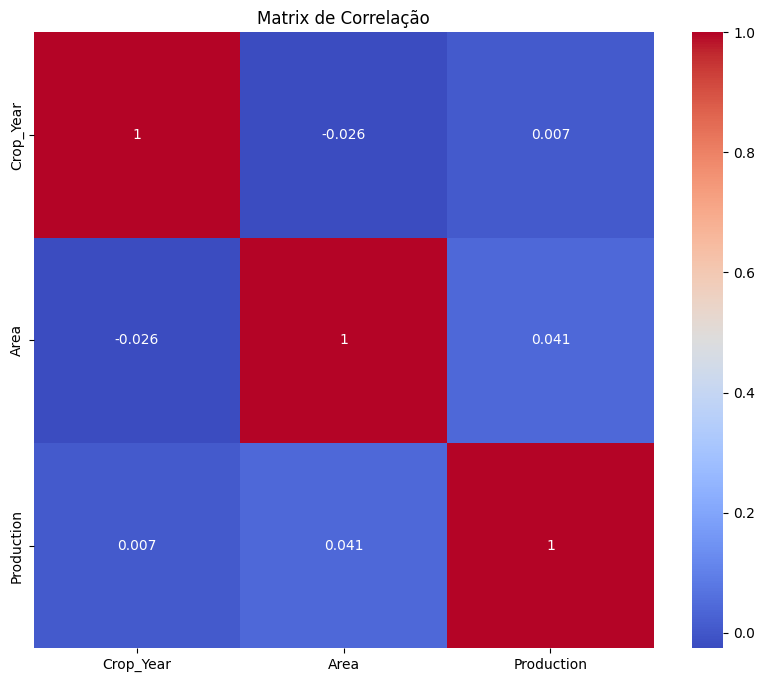

In [37]:
#heatmap de correlação
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrix de Correlação')
plt.show()

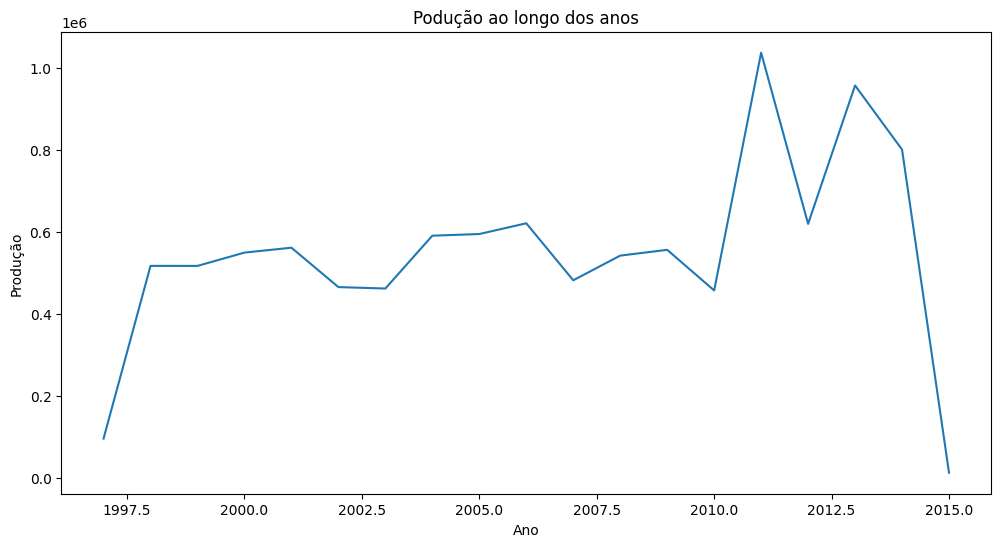

In [38]:
#Produção ao longo dos anos
plt.figure(figsize=(12,6))
sns.lineplot(x='Crop_Year', y='Production', data=df, errorbar=None)
plt.title('Podução ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Produção')
plt.show()

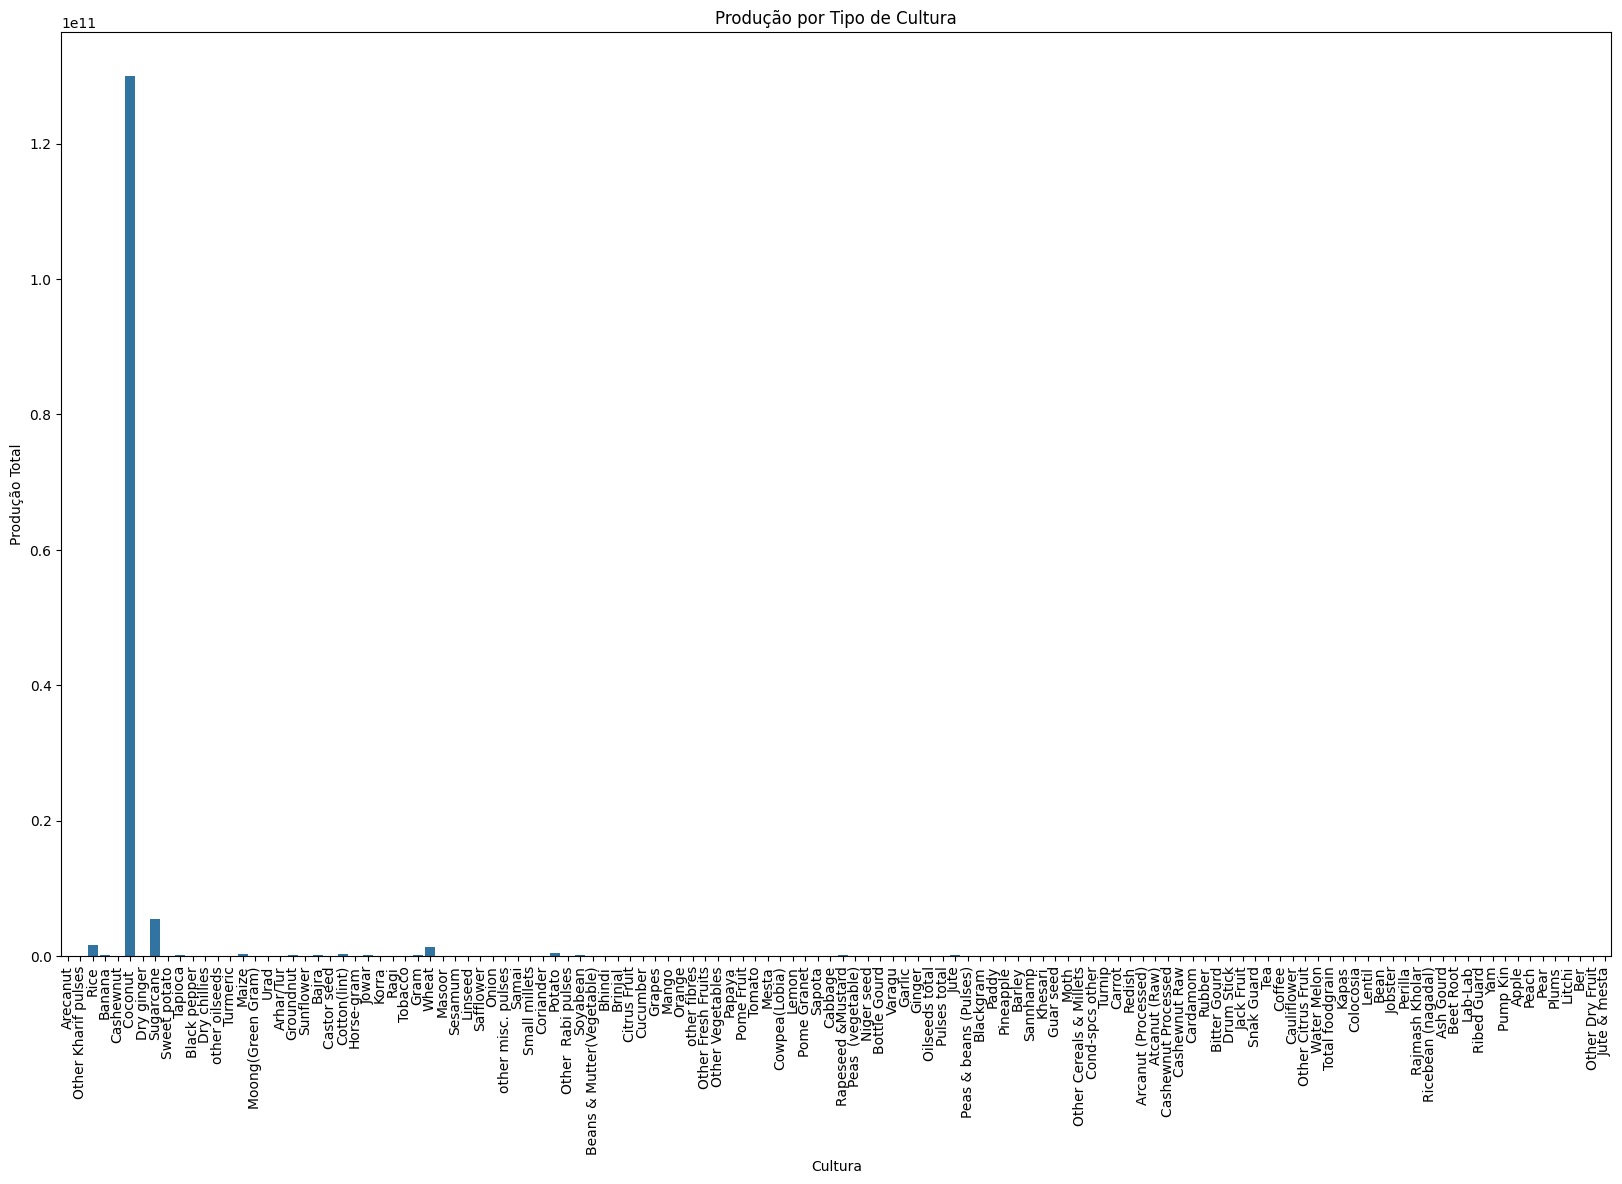

In [39]:
#Produção por tipo de cultura (Gráfico em barras)
df = df.dropna()
plt.figure(figsize=(20,12))
sns.barplot(x='Crop', y='Production', data=df, estimator=sum, errorbar=None)
plt.xticks(rotation=90)
plt.title('Produção por Tipo de Cultura')
plt.xlabel('Cultura')
plt.ylabel('Produção Total')
plt.show()

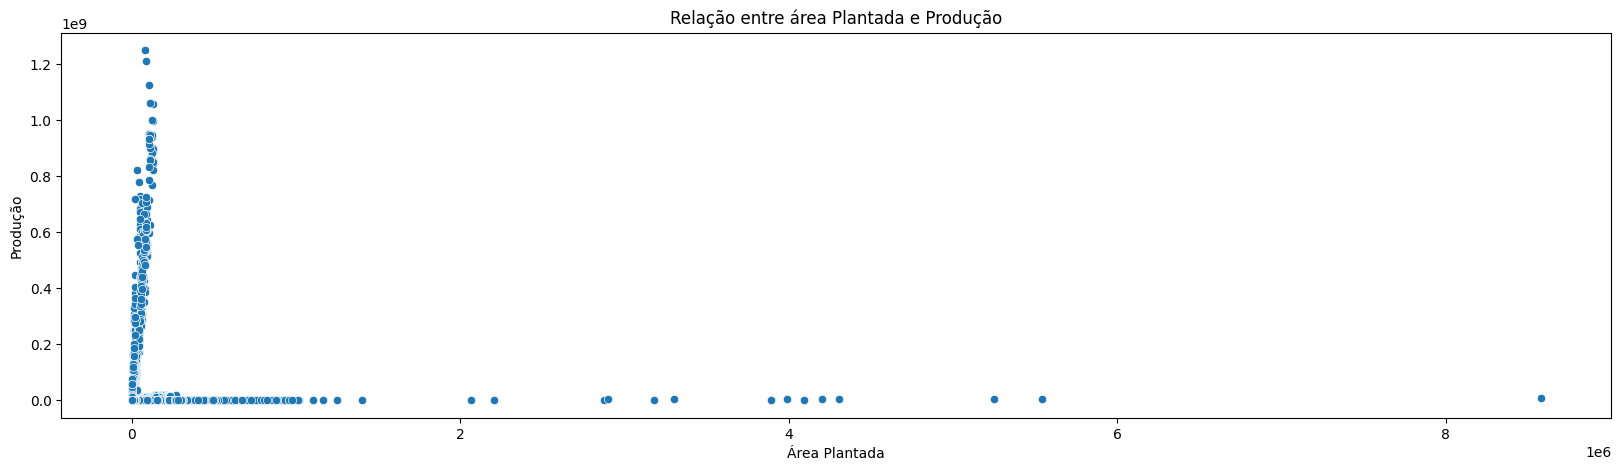

In [40]:
#Gráfico de dispersão da área plantada versus produçpão
df = df.dropna()
plt.figure(figsize=(20,5))
sns.scatterplot(x='Area', y='Production', data=df)
plt.title('Relação entre área Plantada e Produção')
plt.xlabel('Área Plantada')
plt.ylabel('Produção')
plt.show()

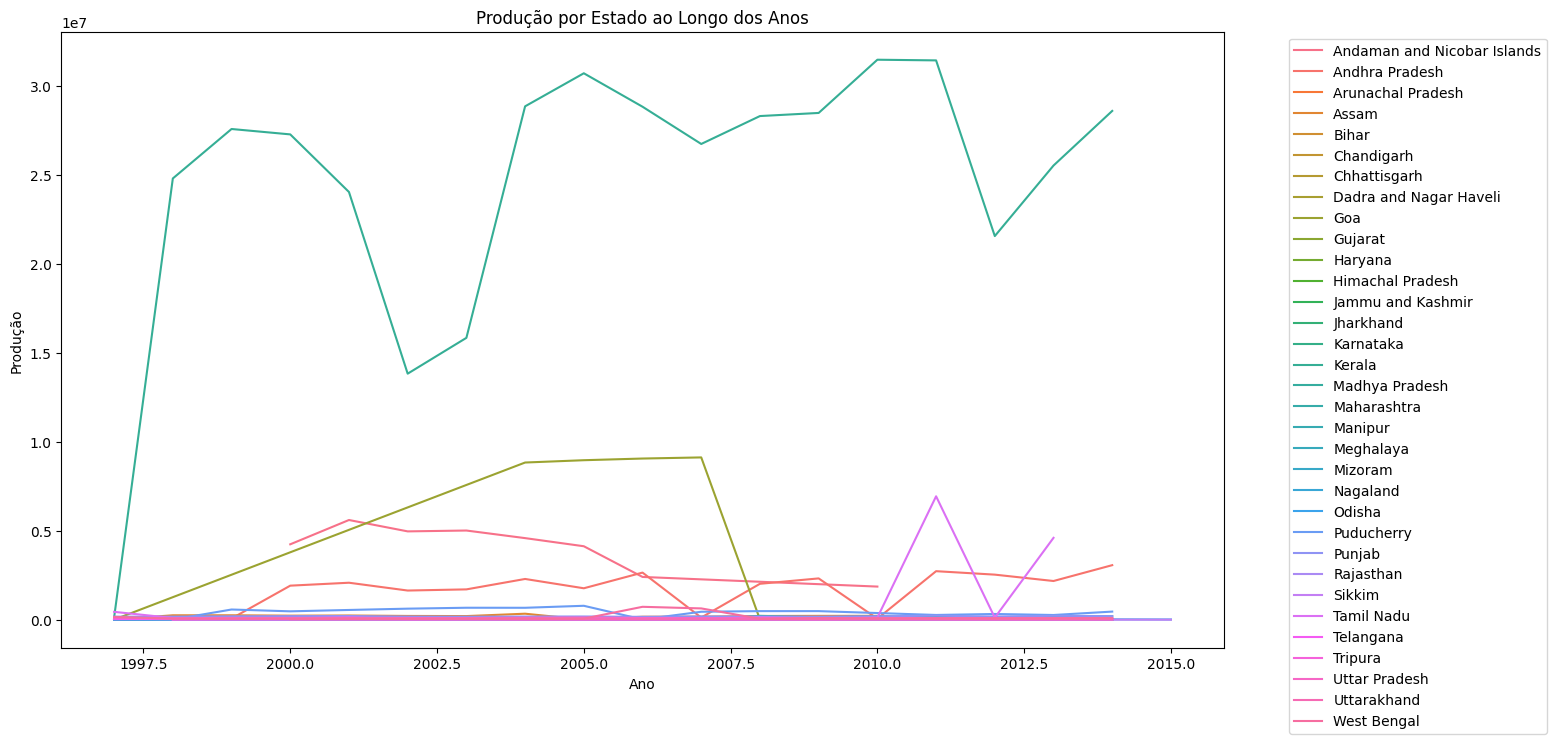

In [41]:
# Gráfico de linha da produção por estado ao longo dos anos
plt.figure(figsize=(15,8))
sns.lineplot(x='Crop_Year', y='Production', hue='State_Name', data=df, errorbar=None)
plt.title('Produção por Estado ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Produção')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


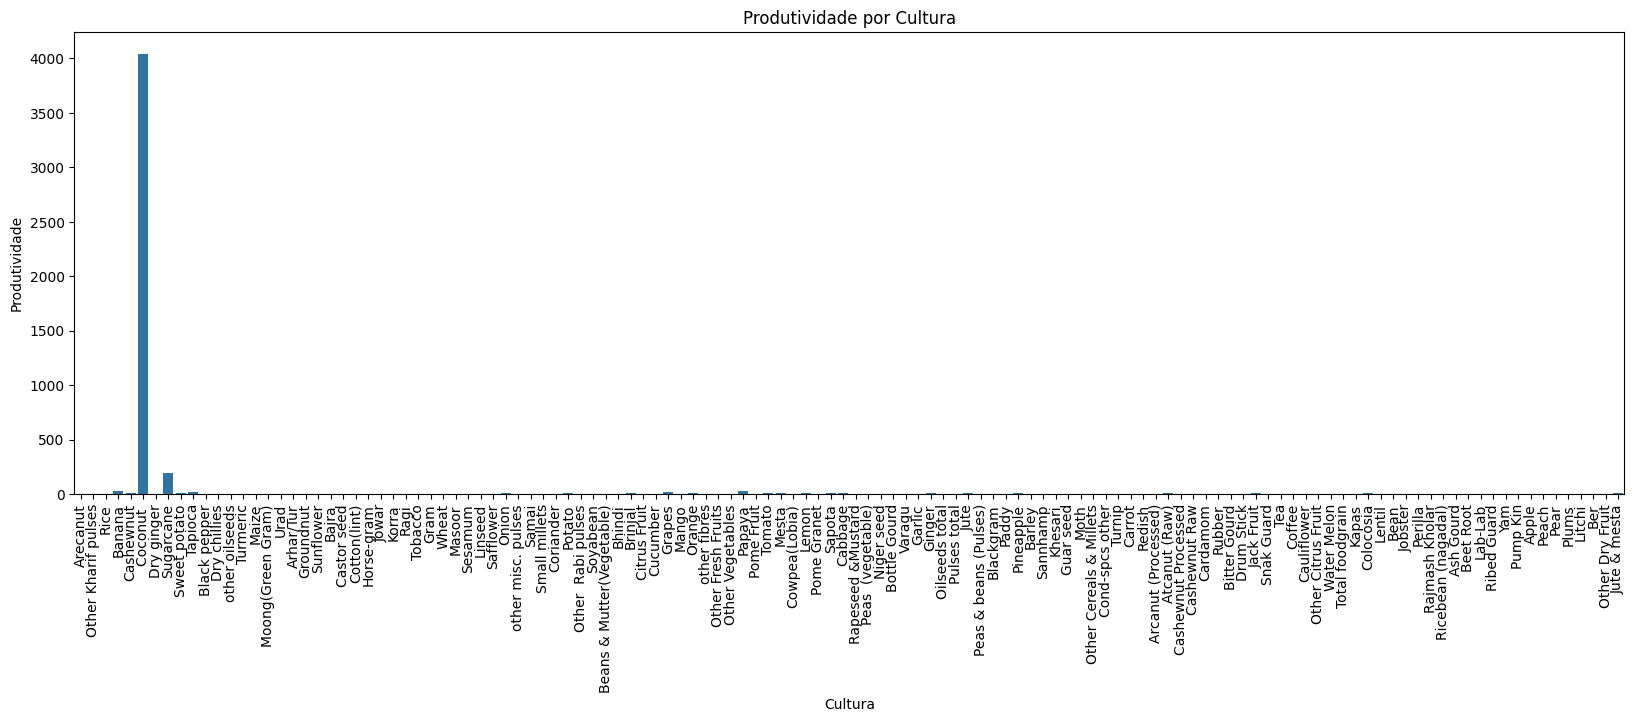

In [42]:
# Calcular a produtividade
df['Produtividade'] = df['Production'] / df['Area']

# Gráfico de barras da produtividade por cultura
plt.figure(figsize=(20,6))
sns.barplot(x='Crop', y='Produtividade', data=df, errorbar=None)
plt.xticks(rotation=90)
plt.title('Produtividade por Cultura')
plt.xlabel('Cultura')
plt.ylabel('Produtividade')
plt.show()


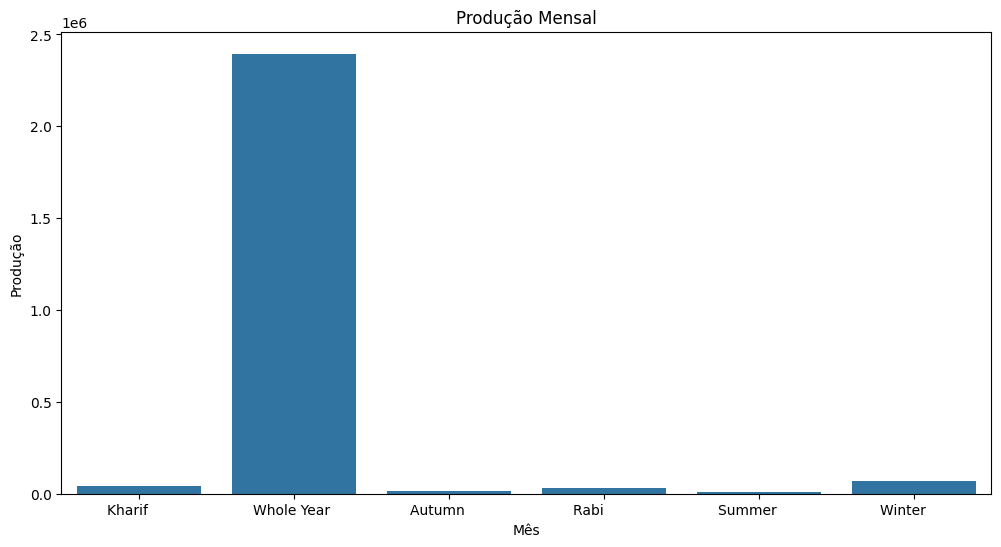

In [43]:
# Gráfico de linha da produção mensal

plt.figure(figsize=(12,6))
sns.barplot(x='Season', y='Production', data=df, errorbar=None)
plt.title('Produção Mensal')
plt.xlabel('Mês')
plt.ylabel('Produção')
plt.show()


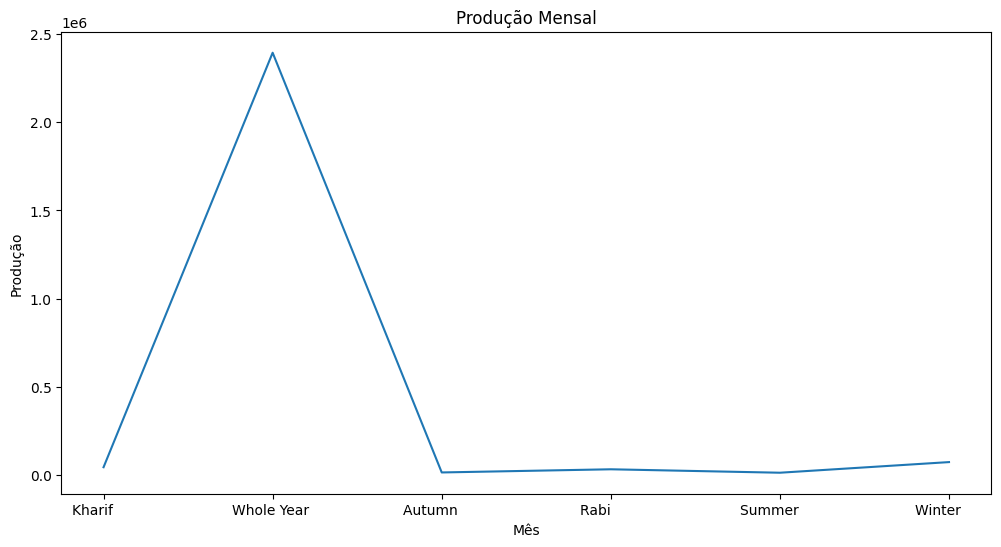

In [44]:
# Gráfico de linha da produção mensal

plt.figure(figsize=(12,6))
sns.lineplot(x='Season', y='Production', data=df, errorbar=None)
plt.title('Produção Mensal')
plt.xlabel('Mês')
plt.ylabel('Produção')
plt.show()


In [45]:
#lista de estações
seasons = list(df['Season'].unique())
seasons


['Kharif     ',
 'Whole Year ',
 'Autumn     ',
 'Rabi       ',
 'Summer     ',
 'Winter     ']

In [46]:
#lista de culturas em cada estação
distinct_crops_in_season_list = []
for x in seasons:
    distinct_crops_in_season_list.append(len(df[df['Season']==x]['Crop'].unique()))
distinct_crops_in_season_list

[82, 103, 25, 68, 31, 28]

In [47]:
#plotando estações
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Distinct Crops', x=seasons, y=distinct_crops_in_season_list)
])


fig.update_layout(
    title='Número de culturas distintas em cada estação',
    xaxis_title='Estações',
    yaxis_title='Número de culturas distintas',
    barmode='group'
)


fig.show()

C:\Users\carlo\AppData\Local\Temp\ipykernel_4960\722749978.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




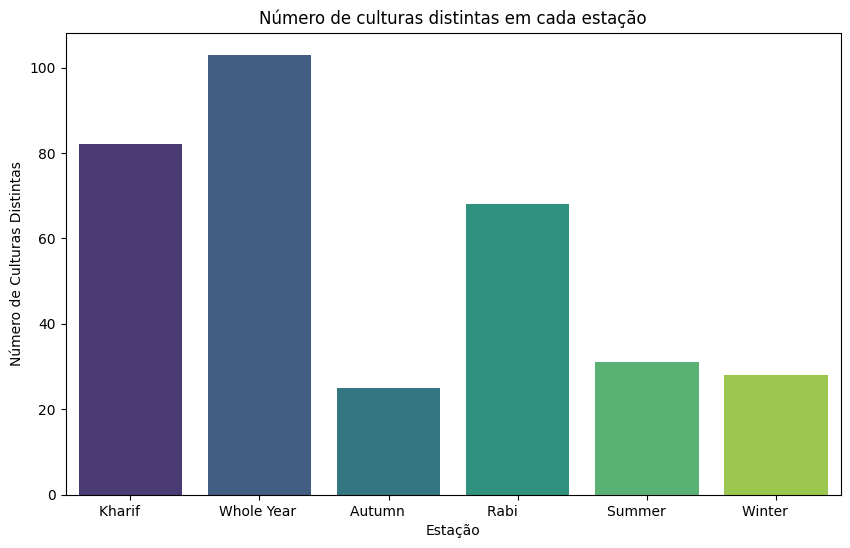

In [48]:
#plotando com o seaborn
data = pd.DataFrame({
    'Estações': seasons,
    'Culturas Distintas': distinct_crops_in_season_list
})

#barplot
plt.figure(figsize=(10,6))
sns.barplot(x='Estações', y='Culturas Distintas', data=data, palette='viridis')

#títulos elabels
plt.title('Número de culturas distintas em cada estação')
plt.xlabel('Estação')
plt.ylabel('Número de Culturas Distintas')

#plotando o gráfico
plt.show()

In [49]:
#definindo variável cultura
crop_list = list(df['Crop'].unique())

In [50]:
len(crop_list)

124

In [51]:
#visualizar lista de culturas
crop_list

['Arecanut',
 'Other Kharif pulses',
 'Rice',
 'Banana',
 'Cashewnut',
 'Coconut ',
 'Dry ginger',
 'Sugarcane',
 'Sweet potato',
 'Tapioca',
 'Black pepper',
 'Dry chillies',
 'other oilseeds',
 'Turmeric',
 'Maize',
 'Moong(Green Gram)',
 'Urad',
 'Arhar/Tur',
 'Groundnut',
 'Sunflower',
 'Bajra',
 'Castor seed',
 'Cotton(lint)',
 'Horse-gram',
 'Jowar',
 'Korra',
 'Ragi',
 'Tobacco',
 'Gram',
 'Wheat',
 'Masoor',
 'Sesamum',
 'Linseed',
 'Safflower',
 'Onion',
 'other misc. pulses',
 'Samai',
 'Small millets',
 'Coriander',
 'Potato',
 'Other  Rabi pulses',
 'Soyabean',
 'Beans & Mutter(Vegetable)',
 'Bhindi',
 'Brinjal',
 'Citrus Fruit',
 'Cucumber',
 'Grapes',
 'Mango',
 'Orange',
 'other fibres',
 'Other Fresh Fruits',
 'Other Vegetables',
 'Papaya',
 'Pome Fruit',
 'Tomato',
 'Mesta',
 'Cowpea(Lobia)',
 'Lemon',
 'Pome Granet',
 'Sapota',
 'Cabbage',
 'Rapeseed &Mustard',
 'Peas  (vegetable)',
 'Niger seed',
 'Bottle Gourd',
 'Varagu',
 'Garlic',
 'Ginger',
 'Oilseeds total',
 '

C:\Users\carlo\AppData\Local\Temp\ipykernel_4960\2577133138.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




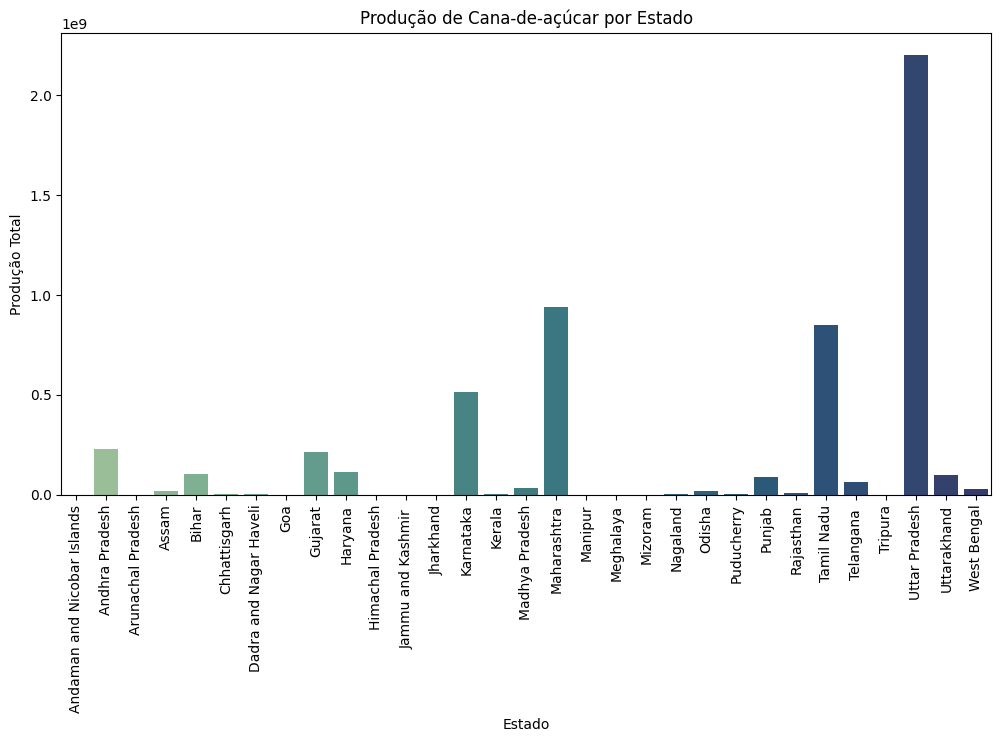

In [52]:
# Filtrar dados para uma cultura específica (por exemplo, 'Rice')
cultura_especifica = df[df['Crop'] == 'Sugarcane']

# Gráfico de barras da produção de Cana-de-açúcar por estado
plt.figure(figsize=(12,6))
sns.barplot(x='State_Name', y='Production', data=cultura_especifica, estimator=sum, errorbar=None, palette='crest')
plt.xticks(rotation=90)
plt.title('Produção de Cana-de-açúcar por Estado')
plt.xlabel('Estado')
plt.ylabel('Produção Total')
plt.show()


In [53]:
#descobrindo qual cultura cresce na maioria dos estados
df[df['Crop'] == 'Rice']['State_Name'].unique() 

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [55]:
#Estados totais para cada cultura
total_states_for_each_crop = []
for x in crop_list:
    total_states_for_each_crop.append(len(df[df['Crop'] == x]['State_Name'].unique()))

In [61]:
# definindo dataframe
crop = df['Crop'].unique()

total_states_for_each_crop = [len(df[df['Crop'] == x]['State_Name'].unique()) for x in crop]

data = pd.DataFrame({
    'Cultura': crop,
    'Total por Estados': total_states_for_each_crop
})


top_10_data = data.sort_values(by='Total por Estados', ascending=False).head(50)



C:\Users\carlo\AppData\Local\Temp\ipykernel_4960\1010369967.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




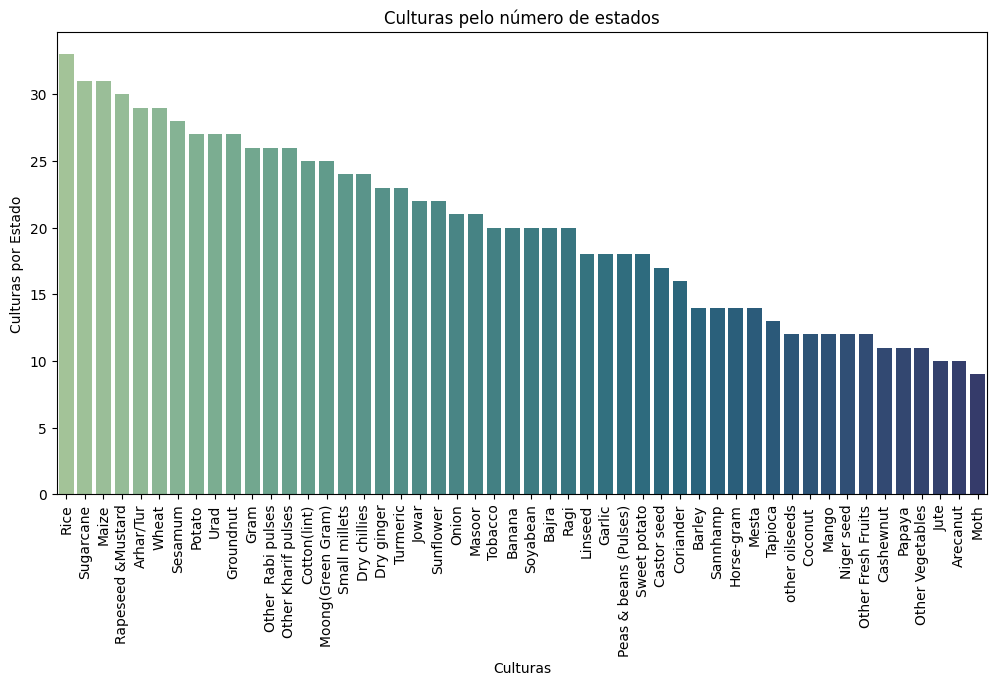

In [64]:
#plotando com o Seaborn

plt.figure(figsize=(12,6))
sns.barplot(x='Cultura', y='Total por Estados', data=top_10_data, palette='crest')

plt.title('Culturas pelo número de estados')
plt.xlabel('Culturas')
plt.ylabel('Culturas por Estado')
plt.xticks(rotation=90)

plt.show()

In [93]:
#Plotando com o plotly

crop = df['Crop'].unique()
total_states_for_each_crop = [len(df[df['Crop'] == x]['State_Name'].unique()) for x in crop]


data = pd.DataFrame({
    'Crop': crop,
    'Total States': total_states_for_each_crop
})


top_data = data.sort_values(by='Total States', ascending=False)


fig = go.Figure(data=[
    go.Bar(
        name='Total States',
        x=top_data['Crop'],
        y=top_data['Total States'],
        marker=dict(
            color=top_data['Total States'],
            colorscale='Viridis', 
            showscale=True
        )
    )
])

fig.update_layout(
    title='Culturas por número de Estados',
    title_x=0.5,
    xaxis_title='Cultura',
    yaxis_title='Número de Estados',
    barmode='group',
    width=2000,  
    height=600,  
    xaxis=dict(
        tickangle=90,
        tickfont=dict(size=8)  
    )
)

fig.show()

In [96]:
#Listando 20 top culturas

crops_analyseds = list(top_data[:20]['Crop'].values)
crops_analyseds


['Rice',
 'Sugarcane',
 'Maize',
 'Rapeseed &Mustard',
 'Arhar/Tur',
 'Wheat',
 'Sesamum',
 'Potato',
 'Urad',
 'Groundnut',
 'Gram',
 'Other  Rabi pulses',
 'Other Kharif pulses',
 'Cotton(lint)',
 'Moong(Green Gram)',
 'Small millets',
 'Dry chillies',
 'Dry ginger',
 'Turmeric',
 'Jowar']

In [108]:
#listando anos de colheitas

years = list(df['Crop_Year'].unique())
years

[np.int64(2000),
 np.int64(2001),
 np.int64(2002),
 np.int64(2003),
 np.int64(2004),
 np.int64(2005),
 np.int64(2006),
 np.int64(2010),
 np.int64(1997),
 np.int64(1998),
 np.int64(1999),
 np.int64(2007),
 np.int64(2008),
 np.int64(2009),
 np.int64(2011),
 np.int64(2012),
 np.int64(2013),
 np.int64(2014),
 np.int64(2015)]

In [112]:
years_analyseds = years[-5:-1]
years_analyseds

[np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014)]

In [116]:
#definindo estados

states = list(df['State_Name'].unique())
states

['Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra and Nagar Haveli',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu and Kashmir ',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana ',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal']

In [121]:
#criando subplots
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows= len(crops_analyseds), cols=len(years_analyseds),
    subplot_titles = [f'{colheita} - {Ano}' for colheita in crops_analyseds for Ano in years_analyseds],
    shared_yaxes=True
)

#determinando linhas e colunas
for i, colheita in enumerate(crops_analyseds):
    for j, Ano in enumerate(years_analyseds):
        state_pro_dict = {}

        for state in states:
            subset = df[(df['Crop'] == colheita) & (df['Crop_Year'] == Ano) & (df['State_Name'] == state)]
            production_sum = subset['Production'].sum()
            state_pro_dict[state] = production_sum

        sorted_states = sorted(state_pro_dict, key=lambda k: state_pro_dict[k], reverse=True)
        sorted_pro = [state_pro_dict[state] for state in sorted_states]
        
        fig.add_trace(go.Bar(x=sorted_states, y=sorted_pro, name=f'{colheita} - {Ano}'), row=i+1, col=j+1)

#Calcular altura apropriada: 500px por linha

fig_height = 300 * len(crops_analyseds)
fig.update_layout(title='Análise de Produção por Cultura e Ano', height=fig_height, width=1000, showlegend=False)

for i in range(len(crops_analyseds)):
    for j in range(len(years_analyseds)):
        fig.update_xaxes(row=i+1, col=j+1, tickangle=90)
fig.update_yaxes(title_text='Production', row=1, col=1)

fig.show()

KeyboardInterrupt: 